In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
training_data_path = 'D:/永豐攻房戰/30_Training Dataset_V2/training_data.csv'
training_data_df = pd.read_csv(training_data_path)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
training_data_df.head(10)

,ID,縣市,鄉鎮市區,路名,土地面積,使用分區,移轉層次,總樓層數,主要用途,主要建材,建物型態,屋齡,建物面積,車位面積,車位個數,橫坐標,縱坐標,備註,主建物面積,陽台面積,附屬建物面積,單價
0,TR-1,台北市,大安區,敦化南路二段,-0.256716,None,11,11,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),32.583333,-0.174154,-0.819326,0.0,305266,2768378,NaN,0.393926,0.183700,-0.438452,4.627714
1,TR-2,台北市,萬華區,水源路,0.100134,None,7,12,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),24.166667,0.314204,-0.819326,0.0,300677,2767990,NaN,-0.316131,0.608577,-0.438452,1.887258
2,TR-3,高雄市,鳳山區,北忠街,0.181921,None,10,15,集合住宅,其他,住宅大樓(11層含以上有電梯),6.166667,0.423366,0.161624,1.0,184815,2504666,NaN,-0.098871,-0.360620,1.525881,1.489072
3,TR-4,新北市,新莊區,福前街,0.085594,None,9,14,集合住宅,鋼筋混凝土造,住宅大樓(11層含以上有電梯),8.833333,0.164249,0.524653,1.0,296653,2772355,NaN,-0.071147,0.315088,0.231984,2.051217
4,TR-5,新北市,板橋區,文化路一段,-0.938116,None,41,43,住家用,鋼骨造,住宅大樓(11層含以上有電梯),11.000000,0.985839,0.532377,1.0,297377,2768472,NaN,0.791954,1.719400,-0.438452,3.269198
5,TR-6,台北市,萬華區,國興路,0.260510,None,2,12,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),39.333333,-0.411438,-0.819326,0.0,301365,2768583,NaN,-0.371295,-0.618277,-0.438452,2.238599
6,TR-7,新北市,樹林區,信義街,0.856422,None,2,4,住家用,鋼筋混凝土造,公寓(5樓含以下無電梯),46.000000,-0.868770,-0.819326,0.0,292687,2763850,NaN,-0.245408,-1.642077,-0.438452,1.348536
7,TR-8,桃園市,平鎮區,中庸路,-0.618421,None,7,13,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),17.000000,-0.468317,-0.819326,0.0,271007,2756216,NaN,-0.445130,-0.341851,-0.190775,1.208000
8,TR-9,新北市,永和區,民樂街,0.736159,None,5,5,住家用,鋼筋混凝土造,公寓(5樓含以下無電梯),42.833333,-0.422929,-0.819326,0.0,303269,2765580,NaN,-0.109338,1.913922,-0.438452,2.074640
9,TR-10,桃園市,中壢區,龍仁路,-0.326509,None,15,15,集合住宅,鋼筋混凝土造,住宅大樓(11層含以上有電梯),6.333333,-0.518302,1.114768,1.0,273749,2758835,NaN,-0.777810,-0.503952,-0.163018,1.254845


In [3]:
all_cols = list(training_data_df.columns)
print(all_cols)

['ID', '縣市', '鄉鎮市區', '路名', '土地面積', '使用分區', '移轉層次', '總樓層數', '主要用途', '主要建材', '建物型態', '屋齡', '建物面積', '車位面積', '車位個數', '橫坐標', '縱坐標', '備註', '主建物面積', '陽台面積', '附屬建物面積', '單價']


In [4]:
target = training_data_df[['單價']]
target.head(5)


,單價
0,4.627714
1,1.887258
2,1.489072
3,2.051217
4,3.269198


In [5]:
features = training_data_df.drop(['單價'], axis=1) # drop: 排除單價
features['縣市'] = features['縣市'].astype(str)
features.head(10)

,ID,縣市,鄉鎮市區,路名,土地面積,使用分區,移轉層次,總樓層數,主要用途,主要建材,建物型態,屋齡,建物面積,車位面積,車位個數,橫坐標,縱坐標,備註,主建物面積,陽台面積,附屬建物面積
0,TR-1,台北市,大安區,敦化南路二段,-0.256716,None,11,11,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),32.583333,-0.174154,-0.819326,0.0,305266,2768378,NaN,0.393926,0.183700,-0.438452
1,TR-2,台北市,萬華區,水源路,0.100134,None,7,12,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),24.166667,0.314204,-0.819326,0.0,300677,2767990,NaN,-0.316131,0.608577,-0.438452
2,TR-3,高雄市,鳳山區,北忠街,0.181921,None,10,15,集合住宅,其他,住宅大樓(11層含以上有電梯),6.166667,0.423366,0.161624,1.0,184815,2504666,NaN,-0.098871,-0.360620,1.525881
3,TR-4,新北市,新莊區,福前街,0.085594,None,9,14,集合住宅,鋼筋混凝土造,住宅大樓(11層含以上有電梯),8.833333,0.164249,0.524653,1.0,296653,2772355,NaN,-0.071147,0.315088,0.231984
4,TR-5,新北市,板橋區,文化路一段,-0.938116,None,41,43,住家用,鋼骨造,住宅大樓(11層含以上有電梯),11.000000,0.985839,0.532377,1.0,297377,2768472,NaN,0.791954,1.719400,-0.438452
5,TR-6,台北市,萬華區,國興路,0.260510,None,2,12,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),39.333333,-0.411438,-0.819326,0.0,301365,2768583,NaN,-0.371295,-0.618277,-0.438452
6,TR-7,新北市,樹林區,信義街,0.856422,None,2,4,住家用,鋼筋混凝土造,公寓(5樓含以下無電梯),46.000000,-0.868770,-0.819326,0.0,292687,2763850,NaN,-0.245408,-1.642077,-0.438452
7,TR-8,桃園市,平鎮區,中庸路,-0.618421,None,7,13,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),17.000000,-0.468317,-0.819326,0.0,271007,2756216,NaN,-0.445130,-0.341851,-0.190775
8,TR-9,新北市,永和區,民樂街,0.736159,None,5,5,住家用,鋼筋混凝土造,公寓(5樓含以下無電梯),42.833333,-0.422929,-0.819326,0.0,303269,2765580,NaN,-0.109338,1.913922,-0.438452
9,TR-10,桃園市,中壢區,龍仁路,-0.326509,None,15,15,集合住宅,鋼筋混凝土造,住宅大樓(11層含以上有電梯),6.333333,-0.518302,1.114768,1.0,273749,2758835,NaN,-0.777810,-0.503952,-0.163018


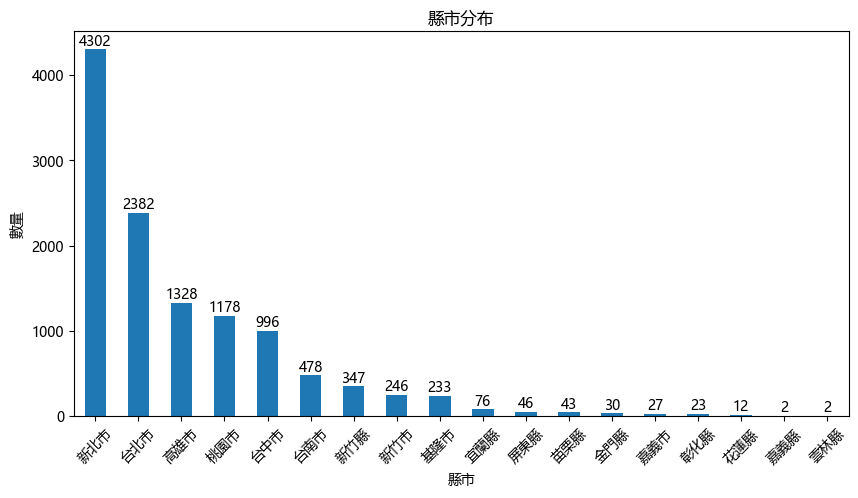

In [6]:
counties = features['縣市']

county_counts = counties.value_counts()

plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
plt.figure(figsize=(10, 5))
county_counts.plot(kind='bar')
plt.title('縣市分布')
plt.xlabel('縣市')
plt.ylabel('數量')
for i, count in enumerate(county_counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45)  # 可选的：旋转 x 轴标签，以防止重叠
plt.show()

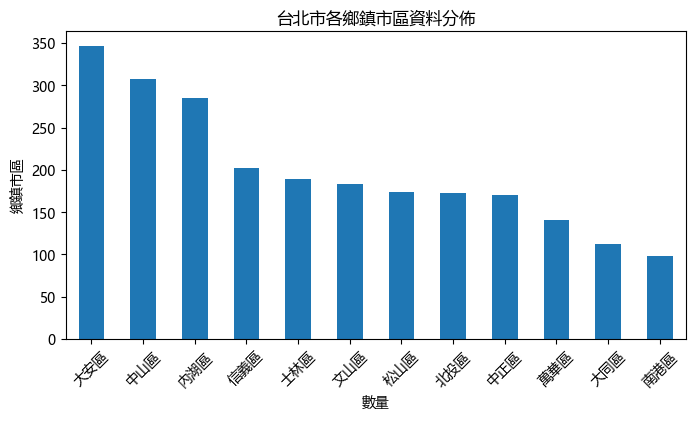

In [7]:
# 筛选 '縣市' 为台北市的行
taipei_df = features[features['縣市'] == '台北市']

districts = taipei_df['鄉鎮市區']

# 使用 value_counts 函数计算每个 '鄉鎮市區' 的出现次数
district_counts = districts.value_counts()

# 创建水平条形图
plt.figure(figsize=(8, 4))
district_counts.plot(kind='bar')
plt.title('台北市各鄉鎮市區資料分佈')
plt.xlabel('數量')
plt.ylabel('鄉鎮市區')
plt.xticks(rotation=45)  # 可选的：旋转 x 轴标签，以防止重叠
plt.show()


In [8]:
# 假设您的 DataFrame 名为 df
# 使用groupby和nunique方法计算每个'縣市'有多少个不同的'鄉鎮市區'
city_district_count = features.groupby('縣市')['鄉鎮市區'].nunique().reset_index(name='不同鄉鎮市區數量')

# 打印结果
print(city_district_count)

     縣市  不同鄉鎮市區數量
0   台中市        19
1   台北市        12
2   台南市        12
3   嘉義市         1
4   嘉義縣         2
5   基隆市         7
6   宜蘭縣         7
7   屏東縣         3
8   彰化縣         2
9   新北市        21
10  新竹市         1
11  新竹縣         6
12  桃園市        11
13  花蓮縣         2
14  苗栗縣         2
15  金門縣         4
16  雲林縣         2
17  高雄市        15


In [9]:
training_data_df[['縣市', '單價']].groupby(['縣市']).mean()

,單價
縣市,
台中市,1.473137
台北市,3.395855
台南市,1.233745
嘉義市,0.816754
嘉義縣,0.809814
基隆市,1.036863
宜蘭縣,1.098314
屏東縣,0.791844
彰化縣,0.927538


In [10]:
training_data_df[['主要用途', '單價']].groupby(['主要用途']).mean()

,單價
主要用途,
一般事務所,3.291668
住商用,2.102321
住家用,1.997874
住工用,1.496880
其他,2.032583
商業用,2.827533
國民住宅,1.168423
工業用,2.306737
店鋪,1.969238


In [11]:
training_data_df[['主要建材', '單價']].groupby(['主要建材']).mean()

,單價
主要建材,
其他,2.386469
加強磚造,2.198192
磚造,1.957526
鋼筋混凝土加強磚造,1.038185
鋼筋混凝土造,1.942209
鋼骨造,3.095042


In [12]:
training_data_df[['建物型態', '單價']].groupby(['建物型態']).mean()

,單價
建物型態,
住宅大樓(11層含以上有電梯),1.994880
公寓(5樓含以下無電梯),1.922345
華廈(10層含以下有電梯),2.069607
透天厝,1.675283


In [13]:
numeric_data = training_data_df[['ID', '土地面積', '移轉層次', '總樓層數', '屋齡', '建物面積', '車位面積', '車位個數', '橫坐標', '縱坐標', '主建物面積', '陽台面積', '附屬建物面積', '單價']]
numeric_data.head(10)

,ID,土地面積,移轉層次,總樓層數,屋齡,建物面積,車位面積,車位個數,橫坐標,縱坐標,主建物面積,陽台面積,附屬建物面積,單價
0,TR-1,-0.256716,11,11,32.583333,-0.174154,-0.819326,0.0,305266,2768378,0.393926,0.183700,-0.438452,4.627714
1,TR-2,0.100134,7,12,24.166667,0.314204,-0.819326,0.0,300677,2767990,-0.316131,0.608577,-0.438452,1.887258
2,TR-3,0.181921,10,15,6.166667,0.423366,0.161624,1.0,184815,2504666,-0.098871,-0.360620,1.525881,1.489072
3,TR-4,0.085594,9,14,8.833333,0.164249,0.524653,1.0,296653,2772355,-0.071147,0.315088,0.231984,2.051217
4,TR-5,-0.938116,41,43,11.000000,0.985839,0.532377,1.0,297377,2768472,0.791954,1.719400,-0.438452,3.269198
5,TR-6,0.260510,2,12,39.333333,-0.411438,-0.819326,0.0,301365,2768583,-0.371295,-0.618277,-0.438452,2.238599
6,TR-7,0.856422,2,4,46.000000,-0.868770,-0.819326,0.0,292687,2763850,-0.245408,-1.642077,-0.438452,1.348536
7,TR-8,-0.618421,7,13,17.000000,-0.468317,-0.819326,0.0,271007,2756216,-0.445130,-0.341851,-0.190775,1.208000
8,TR-9,0.736159,5,5,42.833333,-0.422929,-0.819326,0.0,303269,2765580,-0.109338,1.913922,-0.438452,2.074640
9,TR-10,-0.326509,15,15,6.333333,-0.518302,1.114768,1.0,273749,2758835,-0.777810,-0.503952,-0.163018,1.254845


In [14]:
import twd97

# 將twd97的經緯度格式轉換成wgs84
twd97_x = numeric_data['橫坐標'].to_list()
twd97_y = numeric_data['縱坐標'].to_list()
wgs84 = []
for i in range(len(twd97_x)):
    wgs84.append(twd97.towgs84(twd97_x[i], twd97_y[i]))
wgs84 = np.array(wgs84)
wgs84_df = pd.DataFrame({'wgs84_x':wgs84[:, 0], 'wgs84_y':wgs84[:, 1]}).astype(float)

print(len(wgs84_df))
print(len(numeric_data))
# 加回numeric data
numeric_data_new = pd.concat([numeric_data, wgs84_df], axis=1)
numeric_data_new.head(10)

11751
11751


,ID,土地面積,移轉層次,總樓層數,屋齡,建物面積,車位面積,車位個數,橫坐標,縱坐標,主建物面積,陽台面積,附屬建物面積,單價,wgs84_x,wgs84_y
0,TR-1,-0.256716,11,11,32.583333,-0.174154,-0.819326,0.0,305266,2768378,0.393926,0.183700,-0.438452,4.627714,25.022469,121.547608
1,TR-2,0.100134,7,12,24.166667,0.314204,-0.819326,0.0,300677,2767990,-0.316131,0.608577,-0.438452,1.887258,25.019127,121.502124
2,TR-3,0.181921,10,15,6.166667,0.423366,0.161624,1.0,184815,2504666,-0.098871,-0.360620,1.525881,1.489072,22.640966,120.365799
3,TR-4,0.085594,9,14,8.833333,0.164249,0.524653,1.0,296653,2772355,-0.071147,0.315088,0.231984,2.051217,25.058663,121.462402
4,TR-5,-0.938116,41,43,11.000000,0.985839,0.532377,1.0,297377,2768472,0.791954,1.719400,-0.438452,3.269198,25.023585,121.469444
5,TR-6,0.260510,2,12,39.333333,-0.411438,-0.819326,0.0,301365,2768583,-0.371295,-0.618277,-0.438452,2.238599,25.024457,121.508963
6,TR-7,0.856422,2,4,46.000000,-0.868770,-0.819326,0.0,292687,2763850,-0.245408,-1.642077,-0.438452,1.348536,24.981997,121.422831
7,TR-8,-0.618421,7,13,17.000000,-0.468317,-0.819326,0.0,271007,2756216,-0.445130,-0.341851,-0.190775,1.208000,24.913529,121.207968
8,TR-9,0.736159,5,5,42.833333,-0.422929,-0.819326,0.0,303269,2765580,-0.109338,1.913922,-0.438452,2.074640,24.997280,121.527713
9,TR-10,-0.326509,15,15,6.333333,-0.518302,1.114768,1.0,273749,2758835,-0.777810,-0.503952,-0.163018,1.254845,24.937134,121.235158


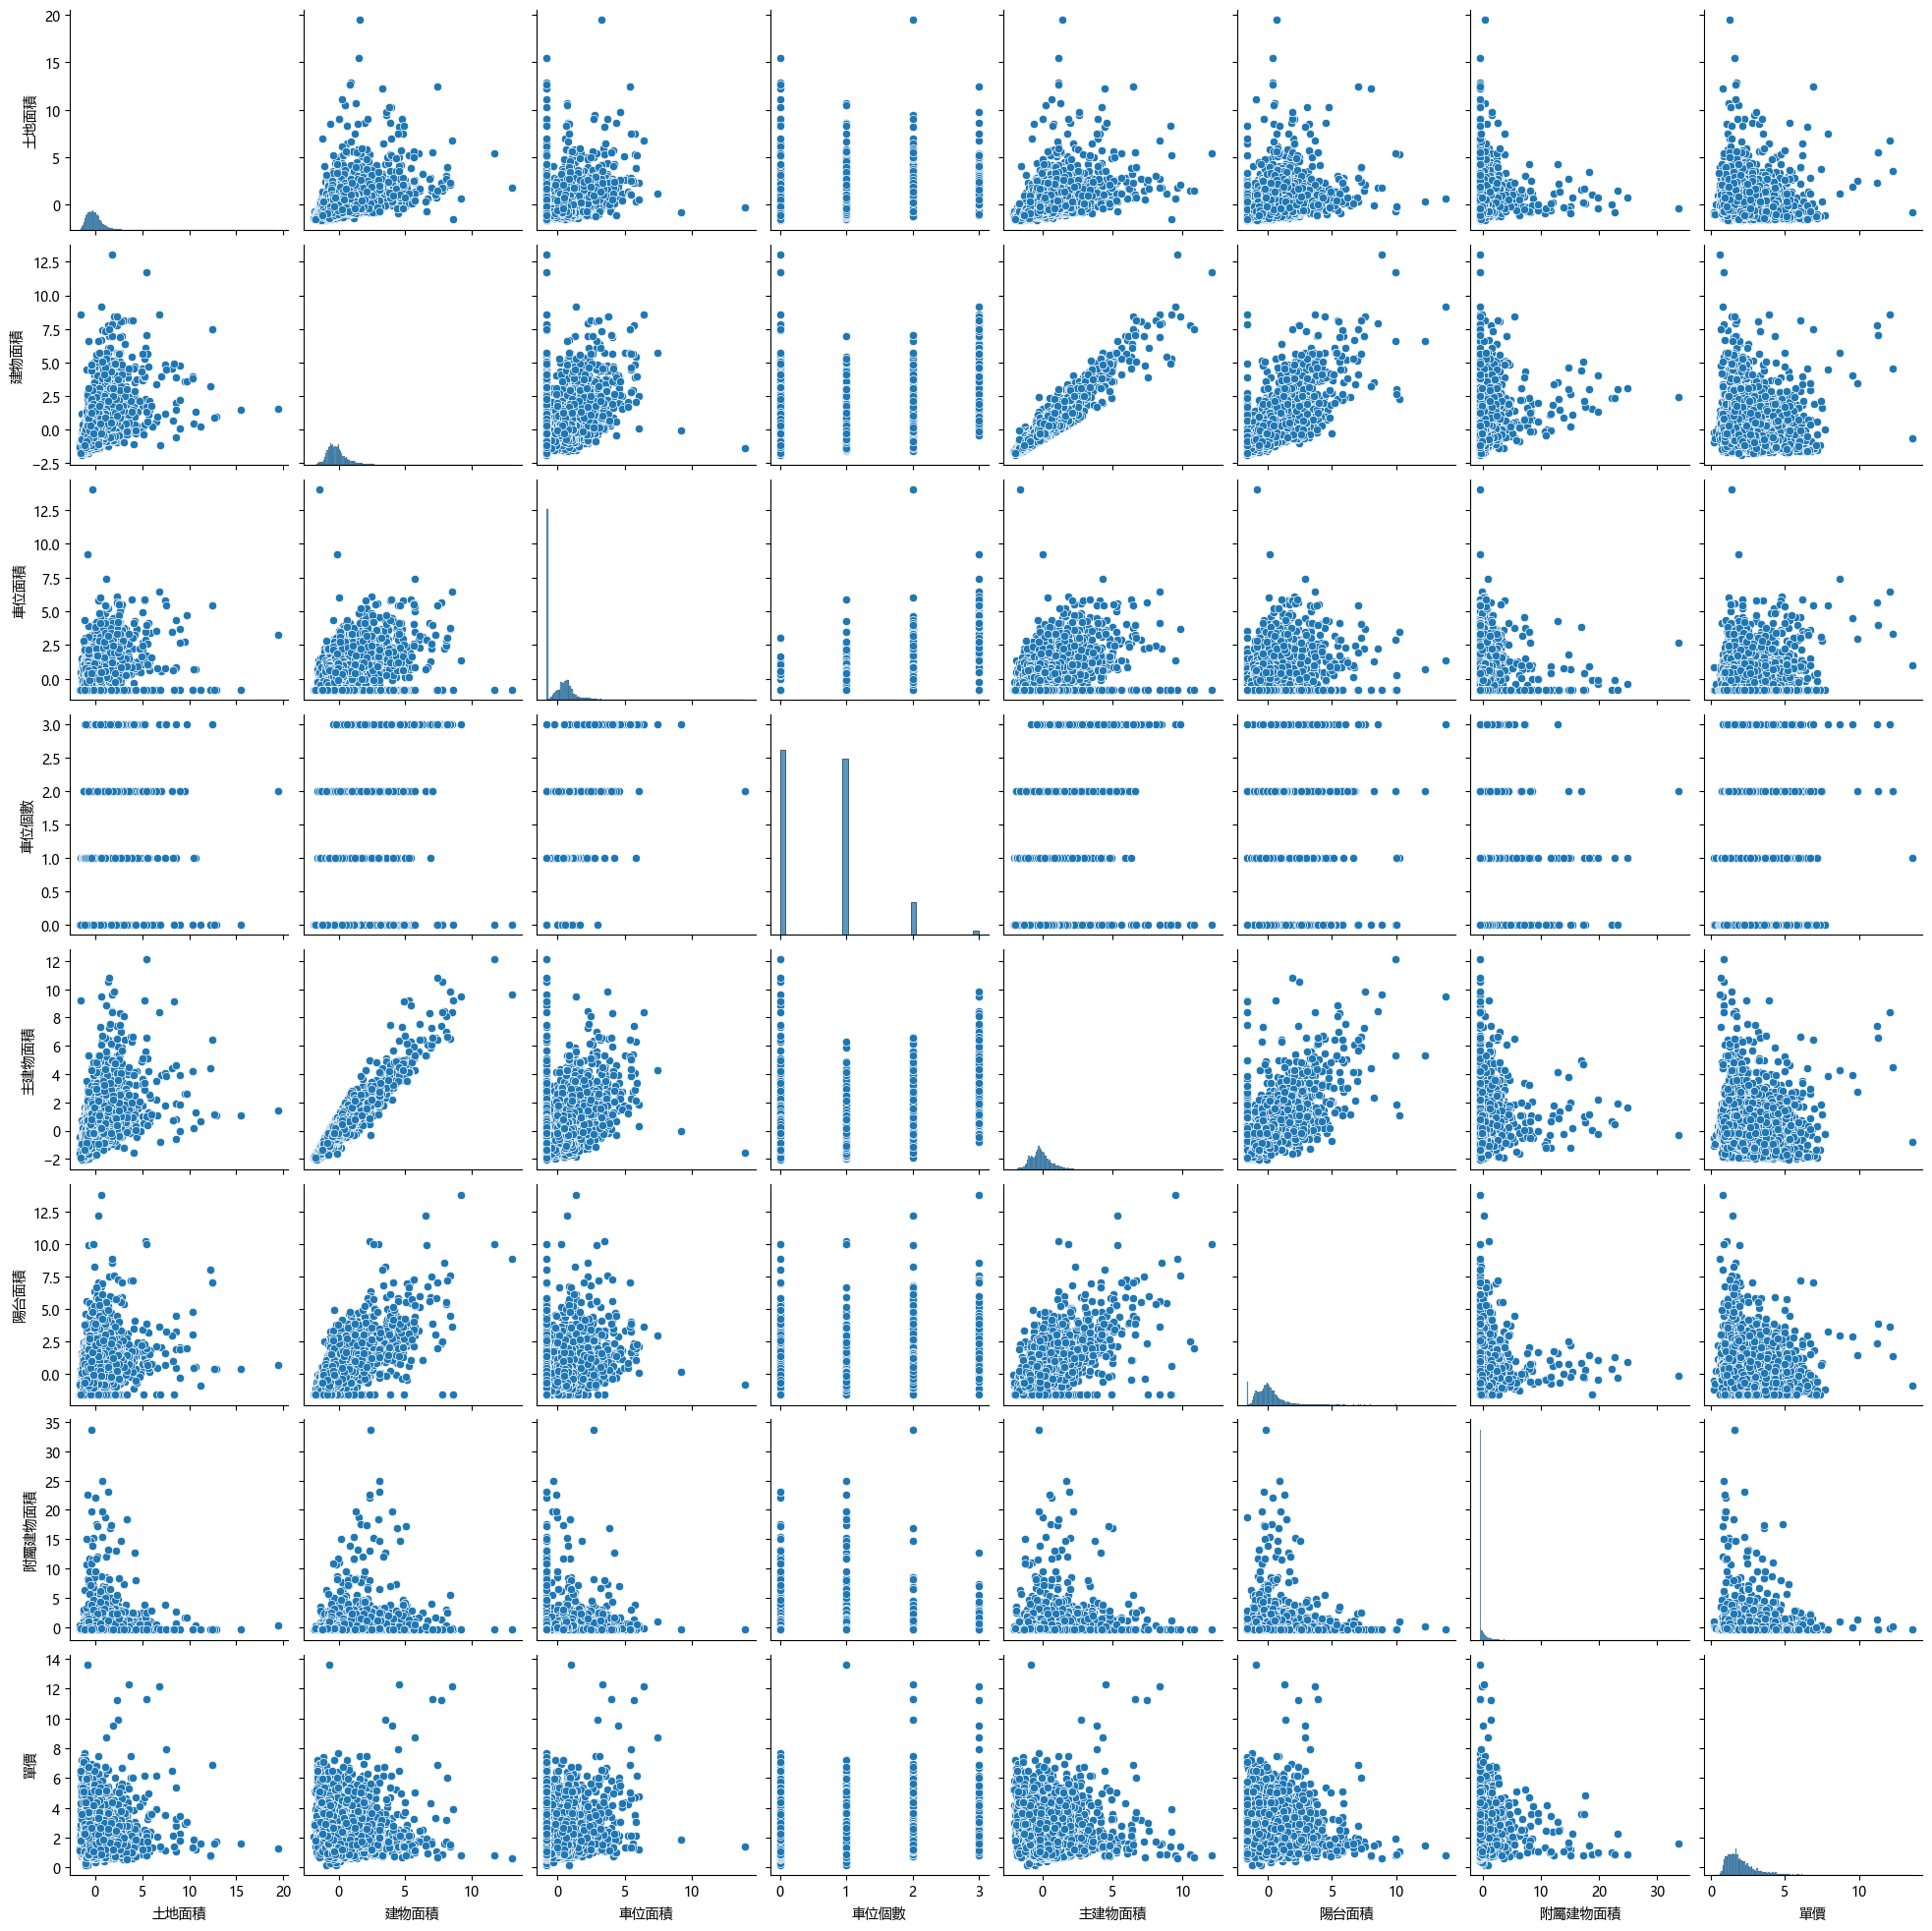

In [15]:
sns.pairplot(numeric_data[['土地面積', '建物面積', '車位面積', '車位個數', '主建物面積', '陽台面積', '附屬建物面積', '單價']])

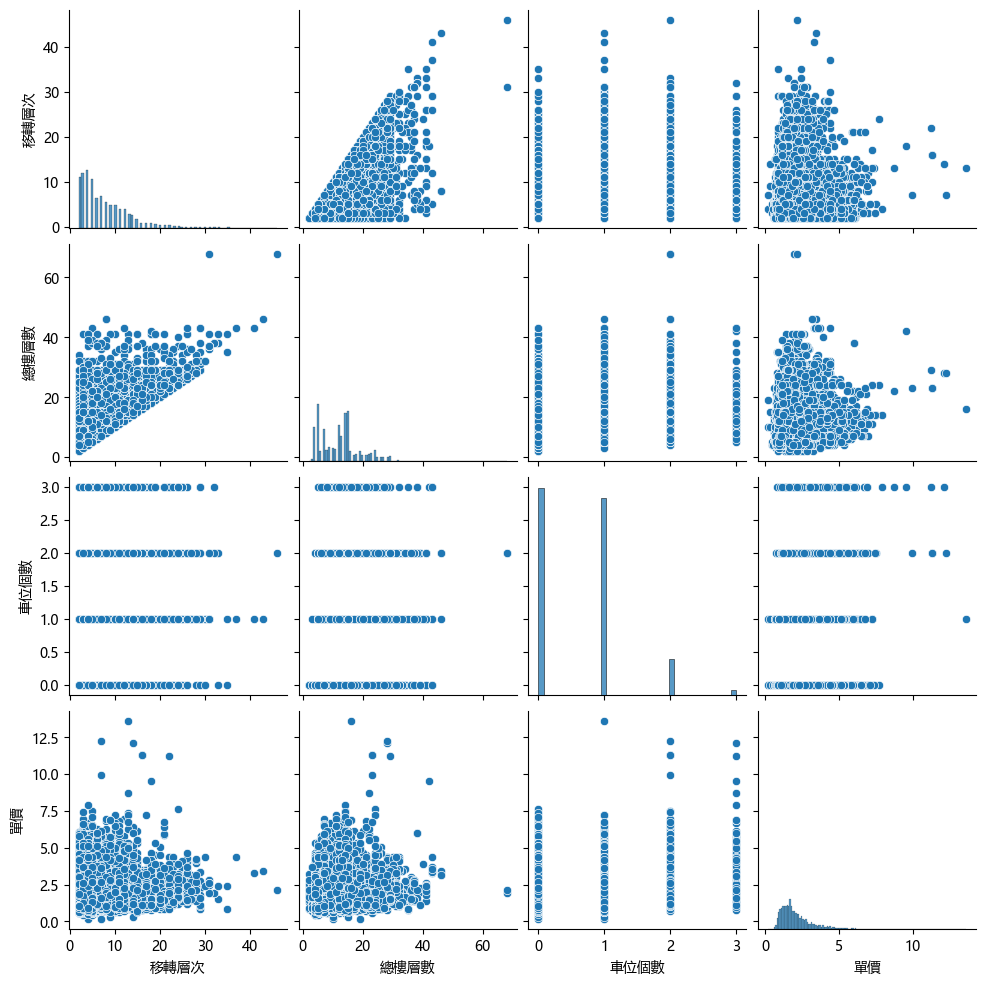

In [16]:
sns.pairplot(numeric_data[['移轉層次', '總樓層數', '車位個數', '單價']])

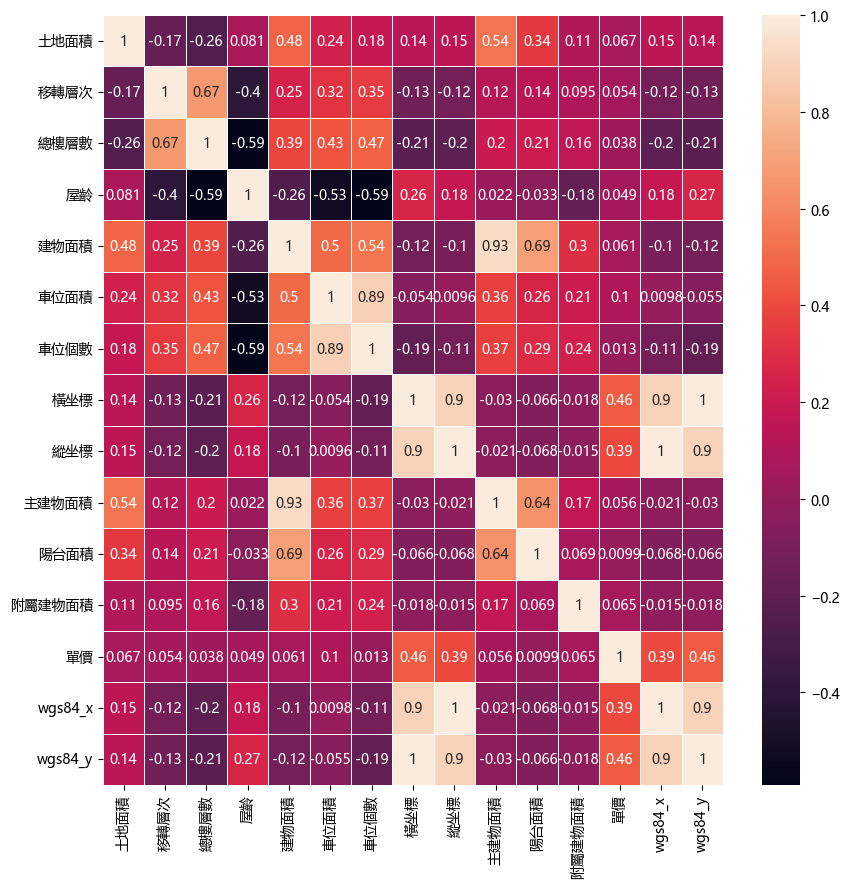

In [17]:
plt.figure(figsize=(10, 10))
sns.heatmap(numeric_data.drop('ID', axis=1).corr(), annot=True, linewidth=0.5)
plt.show()

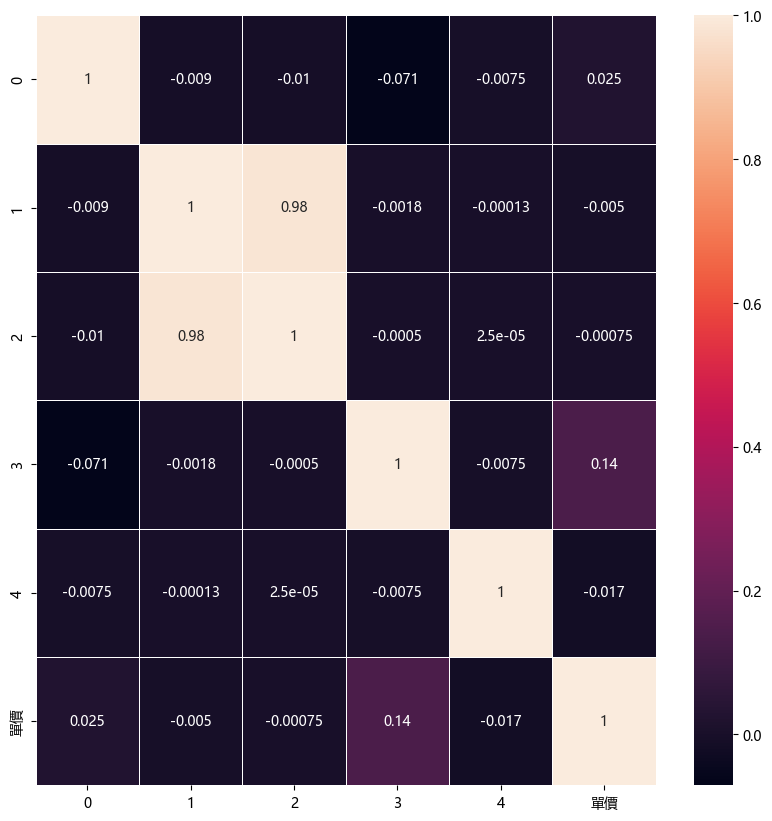

In [19]:
# 移轉層次 / 總樓層數
# 建物面積 / 土地面積
# 車位面積 / 土地面積
# 車位面積 / 車位個數
# 陽台面積 / 主建物面積
# 附屬建物去掉?
newf_1 = training_data_df['移轉層次'] / training_data_df['總樓層數']
newf_2 = training_data_df['建物面積'] / training_data_df['土地面積']
newf_3 = training_data_df['車位面積'] / training_data_df['土地面積']
newf_4 = training_data_df['車位面積'] / training_data_df['車位個數'] # 有用
newf_5 = training_data_df['陽台面積'] / training_data_df['主建物面積']
new_features = [newf_1, newf_2, newf_3, newf_4, newf_5, training_data_df['單價']]
new_features_pd = pd.concat(new_features, axis=1)
new_features_pd.replace([-np.inf, np.inf], 0., inplace=True)
# new_features_pd.head(20)
plt.figure(figsize=(10, 10))
sns.heatmap(new_features_pd.corr(), annot=True, linewidth=0.5)
plt.show()

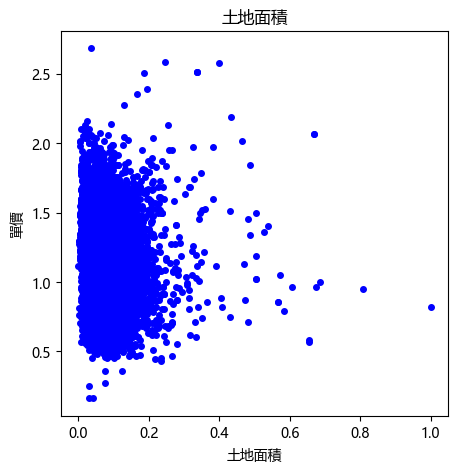

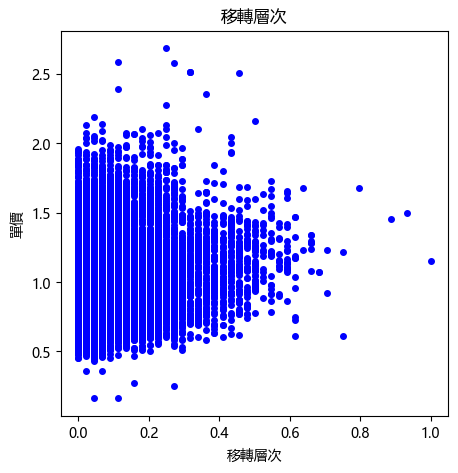

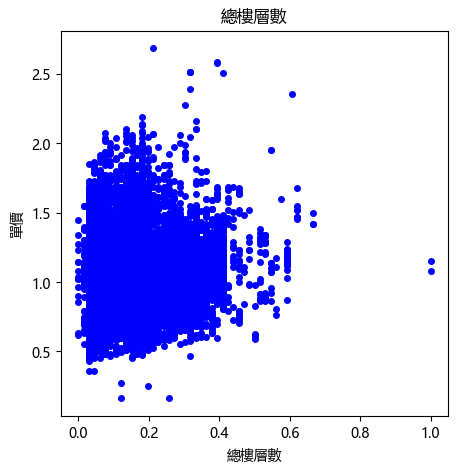

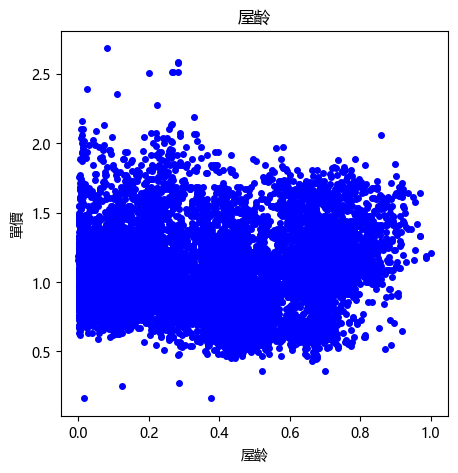

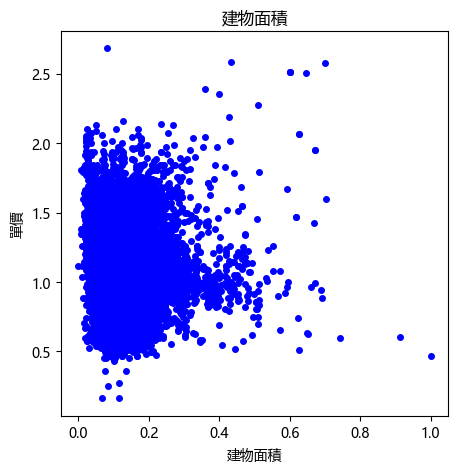

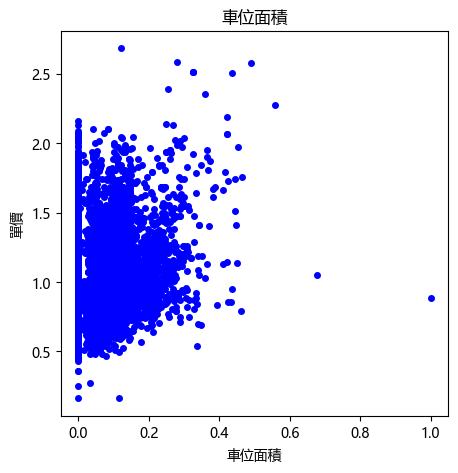

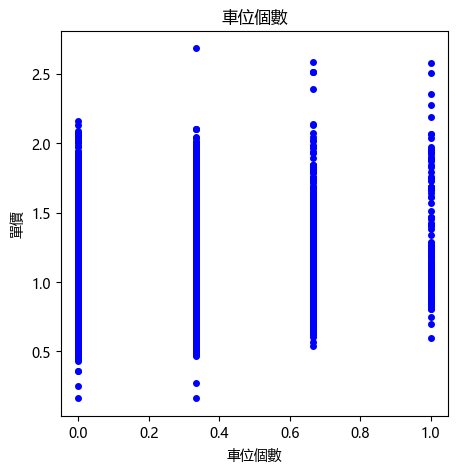

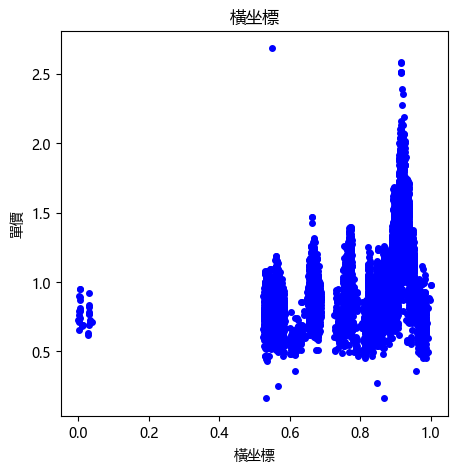

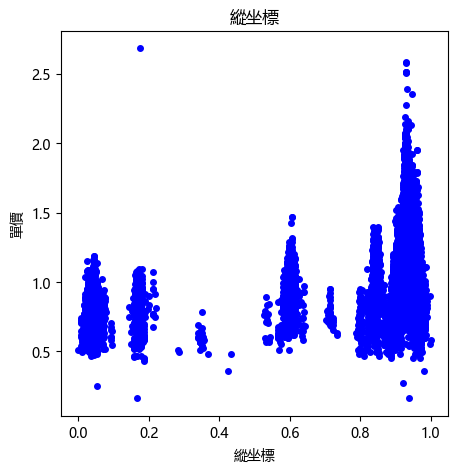

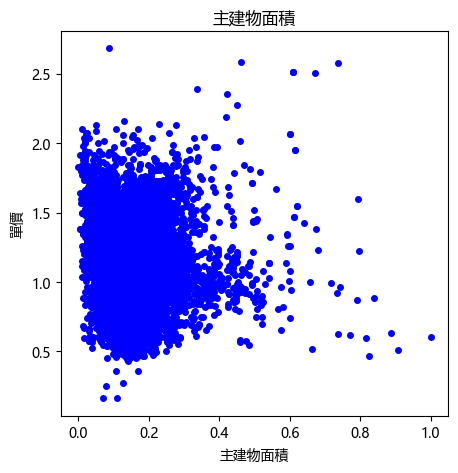

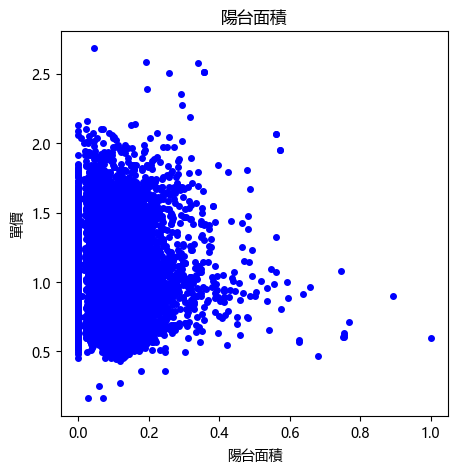

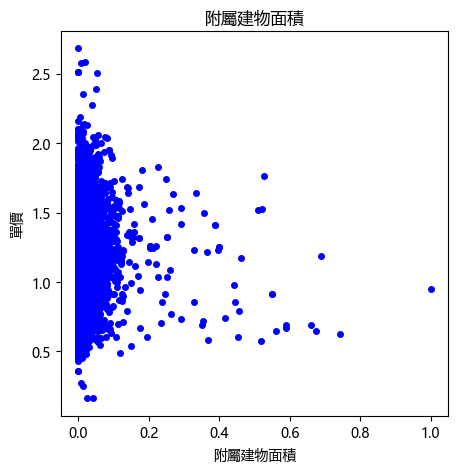

In [11]:
# X minmax後取log1p, y取log1p
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
from sklearn.pipeline import Pipeline

training_data_path = 'D:/永豐攻房戰/30_Training Dataset_V2/training_data.csv'
training_data_df = pd.read_csv(training_data_path)
target = training_data_df[['單價']] # 1 target
target = target.to_numpy()
numeric_data = training_data_df[['土地面積', '移轉層次', '總樓層數', '屋齡', '建物面積', '車位面積', '車位個數', '橫坐標', '縱坐標', '主建物面積', '陽台面積', '附屬建物面積']] # 12 features
numeric_data = numeric_data.to_numpy()

scaler_y = FunctionTransformer(np.log1p, np.expm1)
# scaler_y = MinMaxScaler()
pipline_X = Pipeline([
                ('MinMax', MinMaxScaler()),
                # ('log1p', FunctionTransformer(np.log1p, np.expm1))     
            ])

X_scaled = pipline_X.fit_transform(numeric_data)
y_scaled = scaler_y.fit_transform(target)

feature_names = ['土地面積', '移轉層次', '總樓層數', '屋齡', '建物面積', '車位面積', '車位個數', '橫坐標', '縱坐標', '主建物面積', '陽台面積', '附屬建物面積']
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
for i, name in enumerate(feature_names):
    plt.figure(figsize=(5, 5))
    plt.plot(X_scaled[:, i], y_scaled[:, 0], 'bo', markersize=4)
    plt.title(name)
    plt.xlabel(name)
    plt.ylabel('單價')
    plt.show()


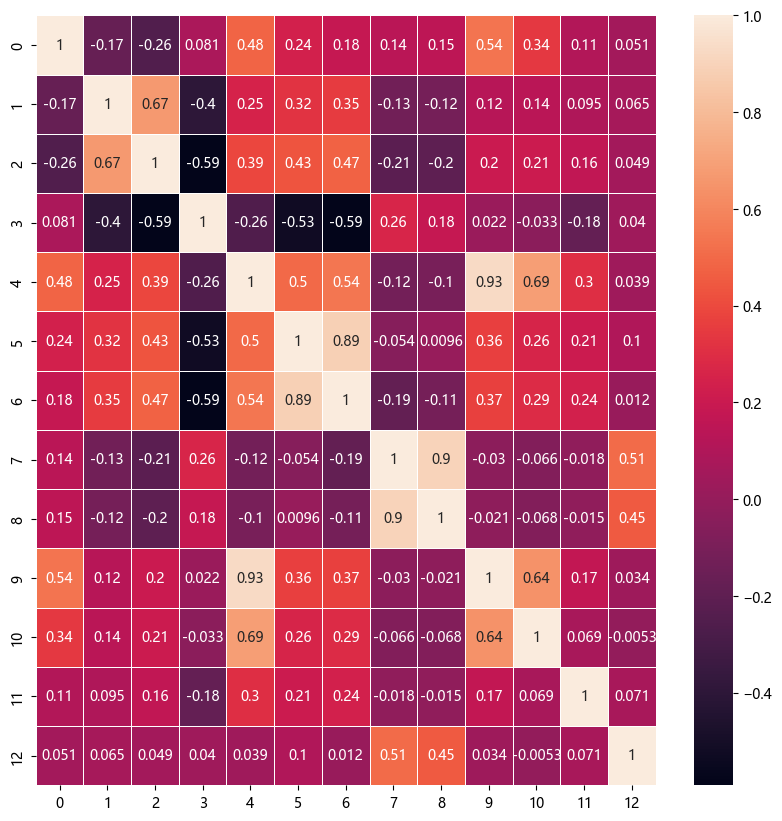

In [12]:
plt.figure(figsize=(10, 10))
sns.heatmap(pd.DataFrame(np.concatenate((X_scaled, y_scaled), axis=1)).corr(), annot=True, linewidth=0.5)
plt.show()

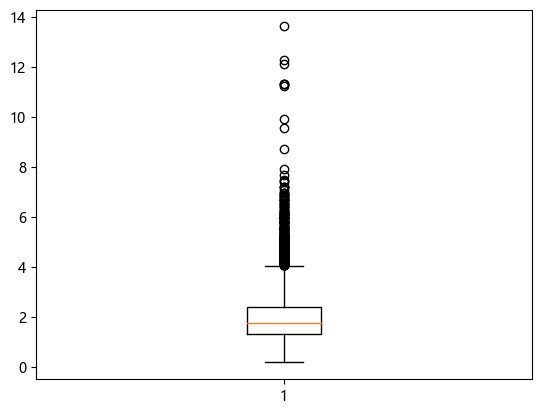

离群值： [0, 22, 59, 101, 120, 129, 182, 204, 206, 212, 213, 234, 247, 288, 308, 333, 335, 370, 392, 397, 419, 431, 433, 443, 473, 512, 551, 597, 639, 650, 671, 744, 749, 769, 802, 821, 831, 832, 877, 895, 908, 940, 966, 992, 1006, 1012, 1021, 1024, 1036, 1066, 1089, 1093, 1151, 1164, 1180, 1196, 1246, 1285, 1296, 1309, 1325, 1338, 1339, 1349, 1384, 1394, 1395, 1462, 1474, 1532, 1543, 1545, 1555, 1610, 1611, 1704, 1705, 1709, 1733, 1742, 1794, 1803, 1826, 1843, 1874, 1888, 1896, 1999, 2000, 2011, 2020, 2072, 2079, 2112, 2130, 2131, 2137, 2139, 2145, 2233, 2259, 2292, 2336, 2349, 2393, 2399, 2485, 2496, 2514, 2552, 2554, 2578, 2599, 2620, 2699, 2730, 2740, 2753, 2754, 2772, 2818, 2832, 2870, 2893, 2896, 2932, 2933, 2940, 2941, 2947, 3006, 3016, 3024, 3060, 3066, 3076, 3085, 3104, 3134, 3160, 3195, 3227, 3262, 3271, 3276, 3277, 3288, 3302, 3306, 3356, 3383, 3396, 3404, 3421, 3449, 3482, 3483, 3517, 3521, 3523, 3532, 3539, 3574, 3584, 3630, 3688, 3694, 3712, 3756, 3819, 3838, 3842, 3891, 3897

In [20]:
# 绘制箱线图
plt.figure()
plt.boxplot(np.array(target))

# 显示箱线图
plt.show()

# 使用箱线图识别离群值
def identify_outliers(data):
    q1 = np.percentile(data, 25)  # 计算第一四分位数（Q1）
    q3 = np.percentile(data, 75)  # 计算第三四分位数（Q3）
    iqr = q3 - q1  # 计算四分位距（IQR）

    lower_bound = q1 - 1.5 * iqr  # 计算下限
    upper_bound = q3 + 1.5 * iqr  # 计算上限

    outliers = [i for i in range(len(data)) if data[i] < lower_bound or data[i] > upper_bound]
    
    return outliers

# 调用函数识别离群值
outliers = identify_outliers(np.array(target))
print("离群值：", outliers)
print(len(outliers))